In [ ]:
import pandas as pd
import numpy as np
#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# connecting to the Google drive
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, f1_score, roc_auc_score

Mounted at /content/drive


Read All data


In [ ]:
A= pd.read_csv('drive/MyDrive/Movember_Fundraiser_Project/Movember/Movember_Donations_2020.csv')
B= pd.read_csv('drive/MyDrive/Movember_Fundraiser_Project/Movember/Movember_Fundraisers_2020.csv')

Concatenating All Files

In [ ]:
A.head()

,member_id_hash,donor_id_hash,date_lcl_donation_time,donation_type,aud_donor_foundation,aud_donor_member,aud_donor_team,aud_donor_total,payment_country,geo_state_region_province,is_business,pmt_card_type,feat_donate_self
0,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,053854f0e34432ed29ddb4058cd1ea2f9dcbd0778bc8d2...,2020-11-02 03:47:04,donate_to_recurring,0.00,0.0,0.0,0.00,au,Victoria,0,visa,0
1,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,ad499dc8fba883ef000230c2468678a2e3444591f0ae9b...,2020-11-22 00:36:10,donate_to_recurring,0.00,0.0,0.0,0.00,au,zz_missing_state_region_province,0,american express,0
2,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,053854f0e34432ed29ddb4058cd1ea2f9dcbd0778bc8d2...,2020-12-02 02:57:05,donate_to_recurring,0.00,0.0,0.0,0.00,au,Victoria,0,visa,0
3,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,ad499dc8fba883ef000230c2468678a2e3444591f0ae9b...,2020-12-21 23:47:53,donate_to_recurring,0.00,0.0,0.0,0.00,au,zz_missing_state_region_province,0,american express,0
4,6e4001871c0cf27c7634ef1dc478408f642410fd3a444e...,73351b614f9db45c3db9bb1b809031cd8a3cbf59df3f2b...,2020-05-01 02:16:37,donate_to_charity,1.62,0.0,0.0,1.62,ie,zz_missing_state_region_province,0,mc,0


In [ ]:
B.head()

,member_id_hash,date_lcl_activation,country,geo_state_region_province,gender,category_fundraising,type_team_captain,type_team_member,tenure_description,campaigns_total_number,...,sum_donations_member_2018,sum_donations_member_2019,sum_donor_foundation_2020,sum_donor_member_2020,sum_donor_team_2020,sum_donor_total_2020,registered_2017,registered_2018,registered_2019,registered_2021
0,e7f2c2e42e4f123ec6b76641f36fbab09a7b6517b50194...,2020-10-18,Australia,Tasmania,m,friends,0,1,Retained,3,...,310.0,125.0,0.0,50.0,0.0,50.0,0.0,1.0,1.0,0.0
1,fb3bd08e5095f32a9c67619e6a8d8d898b20963ce9f85f...,2020-10-16,Australia,New South Wales,m,friends,0,0,Returning,15,...,30.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,5e2168e16b8aad843f6201b1e04956d25bf8c9175171de...,2020-11-05,UK,zz_missing_state_region_province,m,friends,1,0,New,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,feebed60e7b35bb8dcb7ec11638424f686a2ee6e881683...,2020-11-02,Australia,New South Wales,m,friends,0,0,Retained,3,...,0.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,004f3a141d6cdd75d1037c89771a5c28c8ac73ddb5b88d...,2020-10-30,UK,North West,m,workplace,0,0,New,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Merging Tables

In [ ]:
df = pd.merge(A,B,how='left',on='member_id_hash')

In [ ]:
df.head()

,member_id_hash,donor_id_hash,date_lcl_donation_time,donation_type,aud_donor_foundation,aud_donor_member,aud_donor_team,aud_donor_total,payment_country,geo_state_region_province_x,...,sum_donations_member_2018,sum_donations_member_2019,sum_donor_foundation_2020,sum_donor_member_2020,sum_donor_team_2020,sum_donor_total_2020,registered_2017,registered_2018,registered_2019,registered_2021
0,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,053854f0e34432ed29ddb4058cd1ea2f9dcbd0778bc8d2...,2020-11-02 03:47:04,donate_to_recurring,0.00,0.0,0.0,0.00,au,Victoria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,ad499dc8fba883ef000230c2468678a2e3444591f0ae9b...,2020-11-22 00:36:10,donate_to_recurring,0.00,0.0,0.0,0.00,au,zz_missing_state_region_province,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,053854f0e34432ed29ddb4058cd1ea2f9dcbd0778bc8d2...,2020-12-02 02:57:05,donate_to_recurring,0.00,0.0,0.0,0.00,au,Victoria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,ad499dc8fba883ef000230c2468678a2e3444591f0ae9b...,2020-12-21 23:47:53,donate_to_recurring,0.00,0.0,0.0,0.00,au,zz_missing_state_region_province,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6e4001871c0cf27c7634ef1dc478408f642410fd3a444e...,73351b614f9db45c3db9bb1b809031cd8a3cbf59df3f2b...,2020-05-01 02:16:37,donate_to_charity,1.62,0.0,0.0,1.62,ie,zz_missing_state_region_province,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**PERFORMING EXPLORATION DATA ANALYSIS (EDA)**

In [ ]:
# data shape
df.shape

(2099140, 77)

In [ ]:
# sum of null values
df.isnull().sum()

member_id_hash                 0
donor_id_hash                  0
date_lcl_donation_time         0
donation_type                  0
aud_donor_foundation           0
                           ...  
sum_donor_total_2020      259435
registered_2017           259435
registered_2018           259435
registered_2019           259435
registered_2021           259435
Length: 77, dtype: int64

In [ ]:
df.describe()

,aud_donor_foundation,aud_donor_member,aud_donor_team,aud_donor_total,is_business,feat_donate_self,type_team_captain,type_team_member,campaigns_total_number,product_grow_intends,...,sum_donations_member_2018,sum_donations_member_2019,sum_donor_foundation_2020,sum_donor_member_2020,sum_donor_team_2020,sum_donor_total_2020,registered_2017,registered_2018,registered_2019,registered_2021
count,2.099140e+06,2.099140e+06,2.099140e+06,2.099140e+06,2.099140e+06,2.099140e+06,1.839705e+06,1.839705e+06,1.839705e+06,1.839705e+06,...,1.839705e+06,1.839705e+06,1.839705e+06,1.839705e+06,1.839705e+06,1.839705e+06,1.839705e+06,1.839705e+06,1.839705e+06,1.839705e+06
mean,2.393210e+00,4.074777e+01,7.958833e+00,5.111725e+01,2.353821e-02,4.967225e-02,1.624298e-01,4.622013e-01,2.382078e+00,8.568738e-01,...,3.710378e+02,4.143829e+02,5.920757e+01,2.509199e+02,5.566866e+01,3.658079e+02,1.385412e-01,1.798761e-01,2.510087e-01,4.017535e-01
std,3.354156e+02,1.274350e+02,1.817224e+02,4.011027e+02,1.516053e-01,2.172670e-01,3.688448e-01,4.985693e-01,2.580141e+00,3.502016e-01,...,2.549204e+03,2.221088e+03,1.152881e+04,3.082643e+04,8.936401e+03,5.128651e+04,3.454673e-01,3.840843e-01,4.335936e-01,4.902528e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.617000e+01,0.000000e+00,1.886000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.500000e+01,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.886000e+01,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,5.000000e+01,0.000000e+00,5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+01,0.000000e+00,6.521000e+01,0.000000e+00,7.545000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.789091e+05,1.086915e+05,1.131852e+05,2.789091e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,1.000000e+00,...,1.111099e+05,1.173953e+05,2.257061e+06,6.033869e+06,1.748922e+06,1.003985e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# sum of duplicate values
df.duplicated().sum()

1533

In [ ]:
# column informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099140 entries, 0 to 2099139
Data columns (total 77 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   member_id_hash                   object 
 1   donor_id_hash                    object 
 2   date_lcl_donation_time           object 
 3   donation_type                    object 
 4   aud_donor_foundation             float64
 5   aud_donor_member                 float64
 6   aud_donor_team                   float64
 7   aud_donor_total                  float64
 8   payment_country                  object 
 9   geo_state_region_province_x      object 
 10  is_business                      int64  
 11  pmt_card_type                    object 
 12  feat_donate_self                 int64  
 13  date_lcl_activation              object 
 14  country                          object 
 15  geo_state_region_province_y      object 
 16  gender                           object 
 17  category

In [ ]:
# Categorical columns unique values
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['member_id_hash',
 'donor_id_hash',
 'date_lcl_donation_time',
 'donation_type',
 'payment_country',
 'geo_state_region_province_x',
 'pmt_card_type',
 'date_lcl_activation',
 'country',
 'geo_state_region_province_y',
 'gender',
 'category_fundraising',
 'tenure_description',
 'feat_app_operating_system_first',
 'web_traffic_channel_first',
 'web_traffic_source_first',
 'web_traffic_medium_first']

In [ ]:
# Getting the Categorical columns unique values
cols = ['donation_type','payment_country','geo_state_region_province_x','country','geo_state_region_province_y','gender','category_fundraising']
for unique in df[cols]:
    print(unique.upper())
    print()
    print(df[unique].unique())

DONATION_TYPE

['donate_to_recurring' 'donate_to_charity' 'donate_to_individual'
 'donate_to_team']
PAYMENT_COUNTRY

['au' 'ie' 'ca' 'us' 'gb' 'cz' 'nz' 'es' 'fr' 'hk' 'de' 'se' 'za' 'no'
 'nl' 'be' 'dk' 'ch' 'at' 'ex' 'sg']
GEO_STATE_REGION_PROVINCE_X

['Victoria' 'zz_missing_state_region_province' 'New South Wales' 'Alberta'
 'Ontario' 'Manitoba' 'California' 'Queensland' 'South Australia'
 'New Brunswick' 'Quebec' 'British Columbia'
 'Australian Capital Territory' 'Northern Territory' 'Western Australia'
 'Newfoundland and Labrador' 'Nova Scotia' 'Prince Edward Island'
 'Tasmania' 'Washington' 'Greater London' 'East Midlands' 'Louisiana'
 'West Midlands' 'New Mexico' 'New Hampshire' 'Ohio' 'Indiana' 'New York'
 'Michigan' 'Pennsylvania' 'Arizona' 'Minnesota' 'Utah' 'Florida'
 'New Jersey' 'North Carolina' 'Oregon' 'Wisconsin' 'Virginia'
 'Connecticut' 'Yorkshire and the Humber' 'Texas' 'Colorado' 'North West'
 'Illinois' 'Delaware' 'Rhode Island' 'Massachusetts' 'Nevada'
 'South Wes

In [ ]:
# Check Registration Year unique values
reg_year = ['registered_2017', 'registered_2018', 'registered_2019', 'registered_2021']
for years in df[reg_year]:
    print(df[years].unique())
    print(df[reg_year].isna().value_counts())

[nan  1.  0.]
registered_2017  registered_2018  registered_2019  registered_2021
False            False            False            False              1839705
True             True             True             True                259435
dtype: int64
[nan  1.  0.]
registered_2017  registered_2018  registered_2019  registered_2021
False            False            False            False              1839705
True             True             True             True                259435
dtype: int64
[nan  1.  0.]
registered_2017  registered_2018  registered_2019  registered_2021
False            False            False            False              1839705
True             True             True             True                259435
dtype: int64
[nan  1.  0.]
registered_2017  registered_2018  registered_2019  registered_2021
False            False            False            False              1839705
True             True             True             True                259435
dtype: int64


**DATA VISUALIZATIONS**

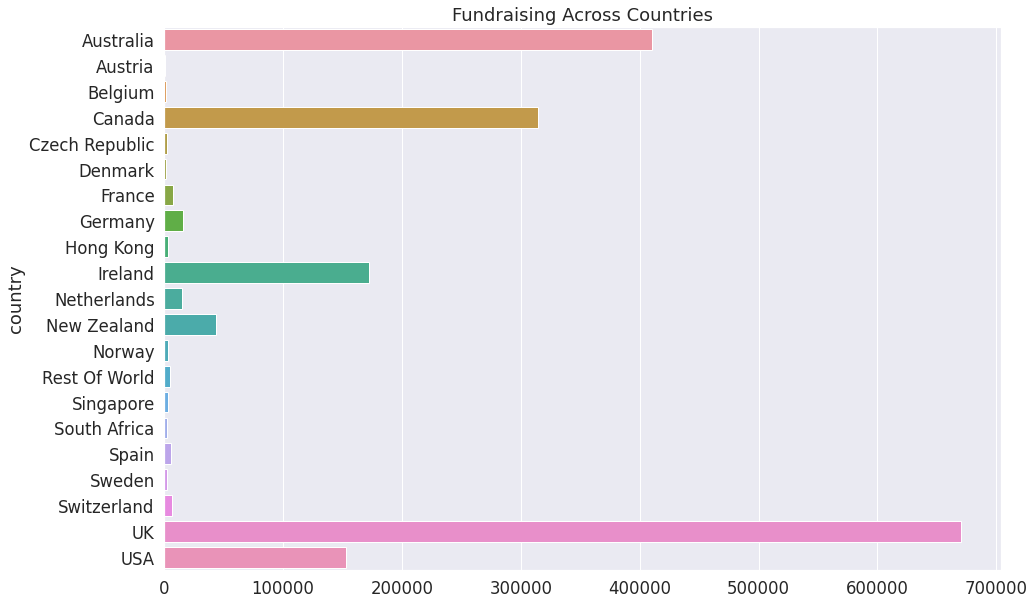

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.barplot(x=df.groupby('country').country.count().values,y=df.groupby('country').country.count().index)
plt.title('Fundraising Across Countries')
plt.savefig("Fundraising Across Contries")
plt.show()

The graph above shows distribution of fundraising across different Countries with UK having the highest and Austria having the lowest

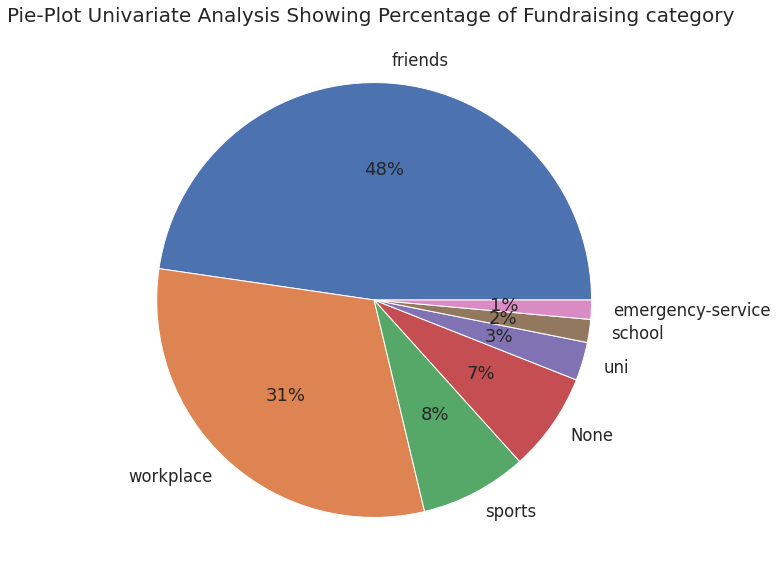

In [ ]:
# Fundraising into Categories
category_fundraising = df.groupby('category_fundraising').category_fundraising.count().sort_values(ascending=False )

plt.figure(figsize=(10, 10))
plt.pie(category_fundraising,labels=category_fundraising.index,autopct='%.0f%%')
plt.title('Pie-Plot Univariate Analysis Showing Percentage of Fundraising category ',fontsize=20)
plt.savefig("Fundraising category %")
plt.show()

The Pie Chart above shows most of the Fundraising Categories which are **Friends** and **Workplace**

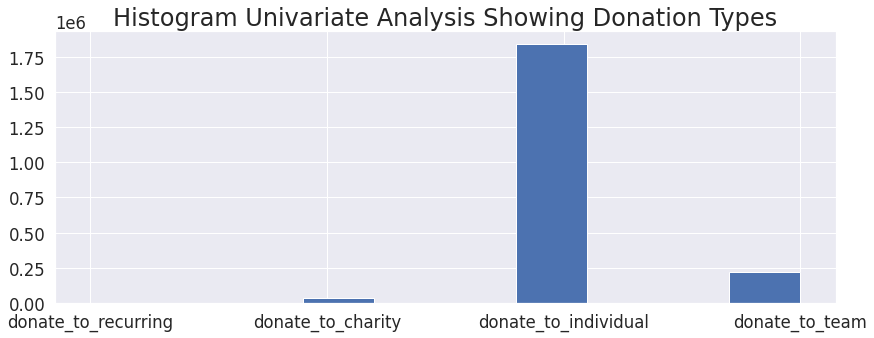

In [ ]:
# Donation type Histogram Plot
plt.figure(figsize=(14, 5))
ab=plt.hist(df['donation_type'])
plt.title("Histogram Univariate Analysis Showing Donation Types",fontsize=24)
plt.savefig("Donation Types")
plt.show()

The graph above shows that most of the Donors donated to more individuals and few to Teams

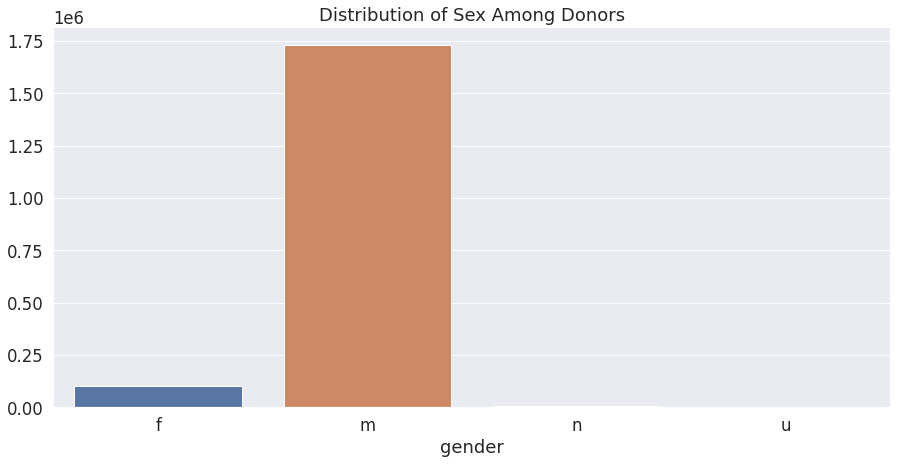

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))
sns.barplot(x=df.groupby('gender')['gender'].count().index,y=df.groupby('gender')['gender'].count().values)
plt.title('Distribution of Sex Among Donors')
plt.savefig("Sex Amoung Donors")
plt.show()

The above graph indicates that more than 60% of the Donors are Male

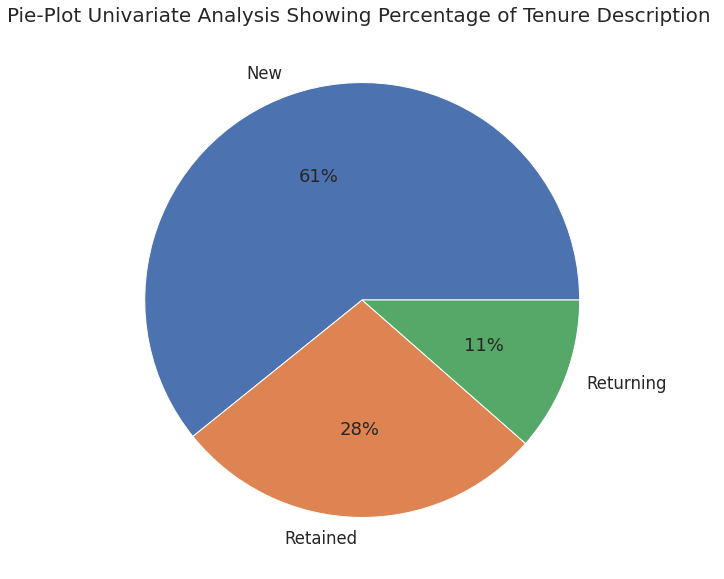

In [ ]:
# Tenure Description pie plot
tenure_description = df.groupby('tenure_description').tenure_description.count().sort_values(ascending=False )

plt.figure(figsize=(10, 10))
plt.pie(tenure_description,labels=tenure_description.index,autopct='%.0f%%')
plt.title('Pie-Plot Univariate Analysis Showing Percentage of Tenure Description ',fontsize=20)
plt.savefig("Fundraising % in Tenure")
plt.show()

The Above Pie Plot indicates that there are More First time Fundraisers, which tends to mean that peoples are willing to Donate

In [ ]:
df['tenure_description'].unique()

array([nan, 'Retained', 'New', 'Returning'], dtype=object)

**DATA PREPARATION AND FEATURES ENGINEERING**

In [ ]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
# check the sum of duplicate values after dropping all duplicate values
df.duplicated().sum()

0

Replace Null Values in the columns with categorical values with the mode of the column

In [ ]:
print(df['geo_state_region_province_x'].isnull().sum())
print(df['geo_state_region_province_y'].isnull().sum())

0
259182


In [ ]:
cat_cols_with_nan = ['country','gender','category_fundraising', 'tenure_description']

for nans in df[cat_cols_with_nan]:
    cols_mode = df[nans].mode()[0]
    df[nans].fillna(cols_mode, inplace=True)
    print(df[nans].isnull().sum())

0
0
0
0


**DROPPING UNECESSARY COLUMNS**

In [ ]:
cols_to_be_dropped = ['member_id_hash','donor_id_hash','feat_facebook_fundraiser','feat_facebook_login','feat_motive','feat_phone_no_provided',
                      'feat_picture','feat_platinum_club','feat_target_met','feat_target_setter','feat_url_personal',
                      'feat_web_click_shares','feat_web_date_nunique','feat_web_session_id_nunique','feat_web_total_pageviews',
                      'feat_web_visited_weekday','feat_web_visited_weekend','geo_state_region_province_y','feat_app_user','feat_app_click_share','feat_app_date_nunique',
                      'feat_app_operating_system_first','feat_app_session_id_nunique','feat_app_total_screenviews','feat_app_view_motracker',
                      'feat_app_visited_weekday_app','feat_app_visited_weekend_app','web_user','web_traffic_channel_first','web_traffic_source_first',
                      'web_traffic_medium_first','web_view_get_involved','web_view_about_us','web_view_mens_health','sum_donations_member_2020',
                      'mean_donations_member_2020','median_donations_member_2020','count_donations_member_2020','max_donations_member_2020',
                      'min_donations_member_2020','std_donations_member_2020','date_lcl_activation','date_lcl_donation_time','geo_state_region_province_x']

# DROP COLUMNS
df.drop(cols_to_be_dropped, axis=1, inplace=True)
df.shape

(2097607, 33)

In [ ]:
df.head()

,donation_type,aud_donor_foundation,aud_donor_member,aud_donor_team,aud_donor_total,payment_country,is_business,pmt_card_type,feat_donate_self,country,...,sum_donations_member_2018,sum_donations_member_2019,sum_donor_foundation_2020,sum_donor_member_2020,sum_donor_team_2020,sum_donor_total_2020,registered_2017,registered_2018,registered_2019,registered_2021
0,donate_to_recurring,0.00,0.0,0.0,0.00,au,0,visa,0,UK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,donate_to_recurring,0.00,0.0,0.0,0.00,au,0,american express,0,UK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,donate_to_recurring,0.00,0.0,0.0,0.00,au,0,visa,0,UK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,donate_to_recurring,0.00,0.0,0.0,0.00,au,0,american express,0,UK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,donate_to_charity,1.62,0.0,0.0,1.62,ie,0,mc,0,UK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


WORKING ON THE **GENDER** COLUMN

In [ ]:
# Replace th (n/u) to non-binary
df['gender'].replace(['n','u'], 'non-binary', inplace=True)
df['gender'].unique()

array(['m', 'f', 'non-binary'], dtype=object)

Replacing NaN values and the convert the data type into an integer

In [ ]:

cols = ['type_team_captain','type_team_member','campaigns_total_number','product_grow_intends',
        'product_host_intends','product_move_intends','product_myow_intends',
        'feat_donote_other','feat_donote_self']


for col in df[cols]:
    col_mode = df[col].mode()[0]
    # fill nan values & convert dtype to integer
    df[col].fillna(col_mode, inplace=True)
    df[col] = df[col].astype(int)


Filling The NaN values in the registration Years with the mode of their columns and then converting the data types to an Integer


In [ ]:
for year in df[reg_year]:
    year_mode = df[year].mode()[0]
    df[year].fillna(year_mode, inplace=True)
    df[year] = df[year].astype(int)

Filling the NaN values in the columns with float data types with the mean of the column

In [ ]:
# Generate columns with float data types
float_cols = df.select_dtypes(include='float64').columns.tolist()

for col in df[float_cols]:
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)

In [ ]:
# Fill the pmt_card_type NaN values with the mode of the column
pmt_mode = df['pmt_card_type'].mode()[0]
df['pmt_card_type'].fillna(pmt_mode, inplace=True)

df['pmt_card_type'].isnull().sum()

0

In [ ]:
df.isnull().sum()

donation_type                0
aud_donor_foundation         0
aud_donor_member             0
aud_donor_team               0
aud_donor_total              0
payment_country              0
is_business                  0
pmt_card_type                0
feat_donate_self             0
country                      0
gender                       0
category_fundraising         0
type_team_captain            0
type_team_member             0
tenure_description           0
campaigns_total_number       0
product_grow_intends         0
product_host_intends         0
product_move_intends         0
product_myow_intends         0
feat_donote_other            0
feat_donote_self             0
sum_donations_member_2017    0
sum_donations_member_2018    0
sum_donations_member_2019    0
sum_donor_foundation_2020    0
sum_donor_member_2020        0
sum_donor_team_2020          0
sum_donor_total_2020         0
registered_2017              0
registered_2018              0
registered_2019              0
register

In [ ]:
# Generating new categorical columns from the dataframe
categ_cols = df.select_dtypes(include='O').columns.tolist()
categ_cols

['donation_type',
 'payment_country',
 'pmt_card_type',
 'country',
 'gender',
 'category_fundraising',
 'tenure_description']

**ENCODING COLUMNS WITH CATEGORICAL FEATURES**

In [ ]:
# One Hot Encoding Using Pandas
df.shape
df = pd.get_dummies(df, columns=categ_cols)
df.shape

(2097607, 98)

**DATA SEGMENTATION**

1 = if the fundraiser was registered in Campaign 2021; this is what your retention model should be trying to predict.....................
So, The column to be predicted is the **Registered_2021** column 

In [ ]:
# Rename the Registered_2021 to Churn
df.rename({'registered_2021':'Churn'}, axis=1, inplace=True)

# Data Modelling
X = df.drop('Churn', axis=1).copy()
y = df['Churn'].copy()

**Splitting The Data Into Training And Testing set**

In [ ]:
# split the data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle=True)

# Check the shape of the splitted data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1573205, 97), (524402, 97), (1573205,), (524402,))

**BUILD MODELS AND EVALUATIONS**

> **Model 1: LogisticRegression**

> **Model 2: RandomForestClassifier**








Roc AUC:rfc 0.9239676346280319
Model Accuracy:rfc 0.8728990354727861
F1 Accuracy:rfc 0.8011990336146985
Classification Report For:rfc               precision    recall  f1-score   support

           0       0.86      0.95      0.91    339557
           1       0.89      0.73      0.80    184845

    accuracy                           0.87    524402
   macro avg       0.88      0.84      0.85    524402
weighted avg       0.87      0.87      0.87    524402


Roc AUC:lr 0.7354490414717161
Model Accuracy:lr 0.7462099686881438
F1 Accuracy:lr 0.5237911218932709
Classification Report For:lr               precision    recall  f1-score   support

           0       0.74      0.94      0.83    339557
           1       0.77      0.40      0.52    184845

    accuracy                           0.75    524402
   macro avg       0.76      0.67      0.68    524402
weighted avg       0.75      0.75      0.72    524402




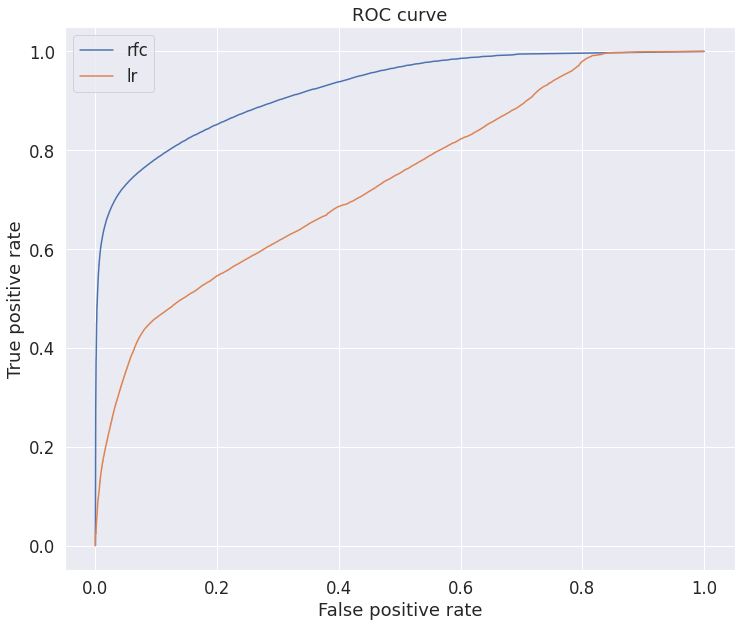

In [ ]:
# Model names
names = ["rfc","lr"]

# Instantiating all Models
models = [
RandomForestClassifier(),
LogisticRegression(random_state=0,penalty='l2',C=100)
]

plt.figure(figsize=(12,10))
for name,model in zip(names,models):

	model.fit(X_train,y_train)
	y_pred = model.predict(X_test)
	y_proba = model.predict_proba(X_test)[:,1]
	print("Roc AUC:"+name, roc_auc_score(y_test, model.predict_proba(X_test)[:,1],average='macro'))
	print("="*100)
	print("Model Accuracy:"+name, accuracy_score(y_test, y_pred))
	print("="*100)
	print("F1 Accuracy:"+name, f1_score(y_test, y_pred))
	print("="*100)
	print("Classification Report For:"+name, classification_report(y_test, y_pred))
	print()
	fpr, tpr, thresholds = roc_curve(y_test, y_proba)
	plt.plot(fpr, tpr, label=name)
 

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('ModelsROCCurve.png')
plt.show()          

Hence we will use RandomForest Classifier over Logistic Regression as Random Forest provides better area under the curve, F1 score and better accuracy, moreover Logistic Regression is slightly poor. Therefore we consider the Random Forest Calssifier as our model for analysis.

**PROJECT SUMMARY**



1.   **United Kingdom(UK) is the country with highest Fundraising**
2.   **Friends and Workplace has the highest percentage of donations in the fundraising category**
3.   **Donors gives more funds to Individual,then few to the Teams and co.**
4.   **More than 60% of the donors are Male**
5. **More than 60% of the First time fundraiser's gives donation**



